# Linear Programming

In [1]:
versioninfo()

Julia Version 1.6.2
Commit 1b93d53fc4 (2021-07-14 15:36 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, skylake)


In [2]:
using Pkg
Pkg.activate("../..")
Pkg.status()

  Activating environment at `~/Dropbox/class/M1399.000200/2021/M1399_000200-2021fall/Project.toml`


      Status `~/Dropbox/class/M1399.000200/2021/M1399_000200-2021fall/Project.toml`
  [7d9fca2a] Arpack v0.4.0
  [6e4b80f9] BenchmarkTools v1.2.0
  [1e616198] COSMO v0.8.1
  [f65535da] Convex v0.14.16
  [a93c6f00] DataFrames v1.2.2
  [31a5f54b] Debugger v0.6.8
  [31c24e10] Distributions v0.24.18
  [e2685f51] ECOS v0.12.3
  [f6369f11] ForwardDiff v0.10.21
  [28b8d3ca] GR v0.61.0
  [c91e804a] Gadfly v1.3.3
  [bd48cda9] GraphRecipes v0.5.7
  [2e9cd046] Gurobi v0.9.14
  [f67ccb44] HDF5 v0.14.3
  [82e4d734] ImageIO v0.5.8
  [6218d12a] ImageMagick v1.2.1
  [916415d5] Images v0.24.1
  [b6b21f68] Ipopt v0.7.0
  [42fd0dbc] IterativeSolvers v0.9.1
  [4076af6c] JuMP v0.21.10
  [b51810bb] MatrixDepot v1.0.4
  [6405355b] Mosek v1.2.1
  [1ec41992] MosekTools v0.9.4
  [76087f3c] NLopt v0.6.3
  [47be7bcc] ORCA v0.5.0
  [a03496cd] PlotlyBase v0.4.3
  [f0f68f2c] PlotlyJS v0.15.0
  [91a5bcdd] Plots v1.22.6
  [438e738f] PyCall v1.92.3
  [d330b81b] PyPlot v2.10.0
  [dca85d43] QuartzImageIO v0.7.3
  [6f49c3

## Linear programming (LP)

* A general linear program takes the form
$$
\begin{array}{ll}
	\text{minimize}& \mathbf{c}^T \mathbf{x} \\
	\text{subject to}& \mathbf{A} \mathbf{x} = \mathbf{b} \\
	 & \mathbf{G} \mathbf{x} \leq \mathbf{h}.
\end{array}
$$
Linear program is a convex optimization problem, why?

<img src="./lp.png" width="500" align="center"/>

* The **standard form** of an LP is
$$
\begin{array}{ll}
	\text{minimize}& \mathbf{c}^T \mathbf{z} \\
	\text{subject to}& \mathbf{A} \mathbf{z} = \mathbf{b} \\
	 & \mathbf{z} \geq \mathbf{0}.
\end{array}
$$
To transform a general linear program into the standard form, we introduce the _slack variables_ $\mathbf{s} \geq \mathbf{0}$ such that $\mathbf{G} \mathbf{x} + \mathbf{s} = \mathbf{h}$. Then we write $\mathbf{x} = \mathbf{x}^+ - \mathbf{x}^-$, where $\mathbf{x}^+ \geq \mathbf{0}$ and $\mathbf{x}^- \geq \mathbf{0}$. This yields the problem
$$
\begin{array}{ll}
	\text{minimize}& \mathbf{c}^T (\mathbf{x}^+ - \mathbf{x}^-) \\
	\text{subject to}& \mathbf{A} (\mathbf{x}^+ - \mathbf{x}^-) = \mathbf{b} \\
	 & \mathbf{G} (\mathbf{x}^+ - \mathbf{x}^-) + \mathbf{s} = \mathbf{h} \\
	 & \mathbf{x}^+ \geq \mathbf{0}, \mathbf{x}^- \geq \mathbf{0}, \mathbf{s} \geq \mathbf{0}
\end{array}
$$
in $\mathbf{x}^+$, $\mathbf{x}^-$, and $\mathbf{s}$. Letting $\mathbf{z} = (\mathbf{x}^{+}, \mathbf{x}^{-}, \mathbf{s})$ makes the formulation standard:
$$
\begin{array}{ll}
	\text{minimize}& (\mathbf{c}^T, -\mathbf{c}^T, \mathbf{0}) \mathbf{z} \\
	\text{subject to}& [\mathbf{A}, -\mathbf{A}, \mathbf{0}] \mathbf{z} = \mathbf{b} \\
	 & [\mathbf{G}, -\mathbf{G}, \mathbf{I}] \mathbf{z} = \mathbf{h} \\
	 & \mathbf{z} \geq \mathbf{0}
\end{array}
$$

    Slack variables are often used to transform a complicated inequality constraint to simple non-negativity constraints.

* The **inequality form** of an LP is
$$
\begin{array}{ll}
	\text{minimize}& \mathbf{c}^T \mathbf{x} \\
	\text{subject to}& \mathbf{G} \mathbf{x} \leq \mathbf{h}.
\end{array}
$$

* Some softwares, e.g., `solveLP` in R, require an LP be written in either standard or inequality form. However a good software should do this for you!

## Problems that can be formulated as LP

* A convex _piecewise-linear minimization_ problem
$$
\begin{array}{ll}
	\text{minimize}& \max_{i=1,\ldots,m} (\mathbf{a}_i^T \mathbf{x} + b_i)
\end{array}
$$
can be transformed to an LP
$$
\begin{array}{ll}
	\text{minimize}& t \\
	\text{subject to}& \mathbf{a}_i^T \mathbf{x} + b_i \le t, \quad i = 1,\ldots,m,
\end{array}
$$
in $\mathbf{x}$ and $t$. Apparently 
$$
	\text{minimize} \max_{i=1,\ldots,m} |\mathbf{a}_i^T \mathbf{x} + b_i|
$$
and
$$
	\text{minimize} \max_{i=1,\ldots,m} (\mathbf{a}_i^T \mathbf{x} + b_i)_+
$$
are also LP.

* Any _convex optimization problem_
$$
\begin{array}{ll}
	\text{minimize}& f_0(\mathbf{x}) \\
	\text{subject to}& f_i(\mathbf{x}) \le 0, \quad i=1,\ldots,m \\
	& \mathbf{a}_i^T \mathbf{x} = b_i, \quad i=1,\ldots,p,
\end{array}
$$
where $f_0,\ldots,f_m$ are convex functions, can be transformed to the _epigraph form_
$$
\begin{array}{ll}
	&\text{minimize}& t \\
	&\text{subject to}& f_0(\mathbf{x}) - t \le 0 \\
	& & f_i(\mathbf{x}) \le 0, \quad i=1,\ldots,m \\
	& & \mathbf{a}_i^T \mathbf{x} = b_i, \quad i=1,\ldots,p
\end{array}
$$
in variables $\mathbf{x}$ and $t$. That is why people often say linear program is universal.

* The _linear fractional programming_
$$
\begin{array}{ll}
	\text{minimize}& \frac{\mathbf{c}^T \mathbf{x} + d}{\mathbf{e}^T \mathbf{x} + f} \\
	\text{subject to}& \mathbf{A} \mathbf{x} = \mathbf{b} \\
	 & \mathbf{G} \mathbf{x} \leq \mathbf{h} \\
	 & \mathbf{e}^T \mathbf{x} + f > 0
\end{array}
$$
can be transformed to an LP
$$
\begin{array}{ll}
	\text{minimize}& \mathbf{c}^T \mathbf{y} + d z \\
	\text{subject to}& \mathbf{G} \mathbf{y} - z \mathbf{h}  \leq \mathbf{0} \\
	 & \mathbf{A} \mathbf{y} - z \mathbf{b} = \mathbf{0} \\
	 & \mathbf{e}^T \mathbf{y} + f z = 1 \\
	 & z \ge 0
\end{array}
$$
in $\mathbf{y}$ and $z$, via transformation of variables
$$
\begin{array}{ll}
	\mathbf{y} = \frac{\mathbf{x}}{\mathbf{e}^T \mathbf{x} + f}, \quad z = \frac{1}{\mathbf{e}^T \mathbf{x} + f}.
\end{array}
$$
See Section 4.3.2 of Boyd and Vandenberghe (2004) for proof.

## LP example 1: compressed sensing

* **Compressed sensing** [Candes and Tao (2006)](https://doi.org/10.1109/TIT.2006.885507) and [Donoho (2006)](https://doi.org/10.1109/TIT.2006.871582) tried to address a fundamental question: how to compress and transmit a complex signal (e.g., musical clips, mega-pixel images), which can be decoded to recover the original signal?

* Suppose a signal $\mathbf{x} \in \mathbb{R}^n$ is *sparse*, in the sense taht there are at most $s$ non-zero components. We undersample the signal by multiplying a (fat) measurement matrix $\mathbf{A} \in \mathbb{R}^{m\times n}$ that has iid normal entries. That is, our measurements are $\mathbf{y} = \mathbf{A} \mathbf{x}$ if there is no noise. Note this is to find a solution to an underdetermined linear system.

* [Candes, Romberg and Tao (2006)](https://doi.org/10.1002/cpa.20124) showed that the solution to
$$
\begin{array}{ll}
	\text{minimize}& \|\mathbf{x}\|_1 \\
	\text{subject to}& \mathbf{A} \mathbf{x} = \mathbf{y}
\end{array}
$$
exactly recovers the true signal under certain conditions on $\mathbf{A}$ when $n \gg s$ and $m \approx s \ln(n/s)$. Why sparsity is a reasonable assumption? _Virtually all real-world images have low information content_. This is the basis of JPEG and MPEG image compression formats. Also used in fast medical imaging:

<img src="./TVimaging.png" width="600"/>

    "Fast and accurate reconstruction for susceptibility source separation in QSM", Seyoon Ko, Jingu Lee, Joong-Ho Won, and Jongho Lee, ISMRM 2018.

* Compared to the minimum $\ell_2$ norm solution (Moore-Penrose), minimum $\ell_1$ solution does not have a closed form solution. However, it is a *convex optimization problem*.

* The $\ell_1$ minimization problem is apparently an LP, by writing $\mathbf{x} = \mathbf{x}^+ - \mathbf{x}^-$,
$$
\begin{array}{ll}
	\text{minimize}& \mathbf{1}^T (\mathbf{x}^+ + \mathbf{x}^-)  \\
	\text{subject to}& \mathbf{A} (\mathbf{x}^+ - \mathbf{x}^-) = \mathbf{y} \\
	 & \mathbf{x}^+ \geq \mathbf{0}, \mathbf{x}^- \geq \mathbf{0}.
\end{array}
$$
  

* Numerical examples:

### Generate a sparse signal and sub-sampling

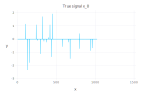

In [3]:
using Gadfly, Random

# random seed
Random.seed!(280)
# Size of signal
n = 1024
# Sparsity (# nonzeros) in the signal
s = 20
# Number of samples (undersample by a factor of 8) 
m = 128

# Generate and display the signal
x0 = zeros(n)
x0[rand(1:n, s)] = randn(s)
# Generate the random sensing matrix
A = randn(m, n) / m
# Subsample by multiplexing
y = A * x0

# plot the true signal
Gadfly.plot(x=1:n, y=x0, Geom.line, Guide.title("True signal x_0"))


### Solve LP by modeling tool Convex.jl

Check [Convex.jl documentation](https://convexjl.readthedocs.io/en/latest/operations.html) for a list of supported operations.

------------------------------------------------------------------
          COSMO v0.8.1 - A Quadratic Objective Conic Solver
                         Michael Garstka
                University of Oxford, 2017 - 2021
------------------------------------------------------------------

Problem:  x ∈ R^{2049},
          constraints: A ∈ R^{2177x2049} (136193 nnz),
          matrix size to factor: 4226x4226,
          Floating-point precision: Float64
Sets:     Nonnegatives) of dim: 2048
          ZeroSet) of dim: 129
Settings: ϵ_abs = 1.0e-05, ϵ_rel = 1.0e-05,
          ϵ_prim_inf = 1.0e-04, ϵ_dual_inf = 1.0e-04,
          ρ = 0.1, σ = 1e-06, α = 1.6,
          max_iter = 5000,
          scaling iter = 10 (on),
          check termination every 25 iter,
          check infeasibility every 40 iter,
          KKT system solver: QDLDL
Acc:      Anderson Type2{QRDecomp},
          Memory size = 15, RestartedMemory,	
          Safeguarded: true, tol: 2.0
Setup Time: 715.02ms

Iter:	Objective:

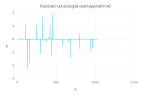

In [4]:
using Convex

## Use Mosek solver
#using Mosek, MosekTools
#opt = () -> Mosek.Optimizer(LOG=1)

## Use Gurobi solver
#using Gurobi
#const GRB_ENV = Gurobi.Env()
#opt = () -> Gurobi.Optimizer(GRB_ENV)  

## Use SCS solver
#using SCS
#opt = () -> SCS.Optimizer(verbose=1)  

# Use COSMO solver
using COSMO
opt = () -> COSMO.Optimizer() 


# Set up optimizaiton problem
x = Variable(n)
problem = minimize(norm(x, 1))
problem.constraints += A * x == y

# Solve the problem
@time solve!(problem, opt)

# Display the solution
Gadfly.plot(x=1:n, y=x0, Geom.point)
Gadfly.plot(x=1:n, y=x.value, Geom.line, Guide.title("Reconstructed signal overlayed with x0"))


## LP example 2: quantile regression

<img src="./quantregbin3.png" width="300"/>

* In linear regression, we model the mean of response variable as a function of covariates. In many situations, the error variance is not constant, the distribution of $y$ may be asymmetric, or we simply care about the quantile(s) of response variable. Quantile regression offers a better modeling tool in these applications.


* In $\tau$-quantile regression, we minimize the loss function
$$
	f(\beta) = \sum_{i=1}^n \rho_\tau (y_i - \mathbf{x}_i^T \beta),
$$
where $\rho_\tau(z) = z (\tau - 1_{\{z < 0\}})$. 

    <img src="https://i.stack.imgur.com/DmKq7.png" width="300"/>


Writing $\mathbf{y}  - \mathbf{X} \beta = \mathbf{r}^+ - \mathbf{r}^-$, this is equivalent to the LP
$$
\begin{array}{ll}
	\text{minimize} & \tau \mathbf{1}^T \mathbf{r}^+ + (1-\tau) \mathbf{1}^T \mathbf{r}^- \\
	\text{subject to} & \mathbf{r}^+ - \mathbf{r}^- = \mathbf{y} - \mathbf{X} \beta \\
	 & \mathbf{r}^+ \geq \mathbf{0}, \mathbf{r}^- \geq \mathbf{0}
\end{array}{ll}
$$
in $\mathbf{r}^+$, $\mathbf{r}^-$, and $\beta$.

## LP Example 3: LAD ($\ell_1$ regression)

* A popular method in robust statistics is the least absolute deviation (LAD) regression that minimizes the $\ell_1$ norm of the residual vector $\|\mathbf{y} - \mathbf{X} \beta\|_1$. This apparently is equivalent to the LP
$$
\begin{array}{ll}
	\text{minimize}& \mathbf{1}^T (\mathbf{r}^+ + \mathbf{r}^-) \\
	\text{subject to} & \mathbf{r}^+ - \mathbf{r}^- = \mathbf{y} - \mathbf{X} \beta \\
	 & \mathbf{r}^+ \geq \mathbf{0}, \mathbf{r}^- \geq \mathbf{0}
\end{array}
$$
in $\mathbf{r}^+$, $\mathbf{r}^-$, and $\beta$. 

* $\ell_1$ regression = LAD = 1/2-quantile regression.

## LP Example 3: $\ell_\infty$ regression (Chebychev approximation)

* Minimizing the worst possible residual $\|\mathbf{y} - \mathbf{X} \beta\|_\infty$ is equivalent to the LP
$$
\begin{array}{ll}
	\text{minimize}& t \\
	\text{subject to}& -t \le y_i - \mathbf{x}_i^T \beta \le t, \quad i = 1,\dots,n
\end{array}
$$
in variables $\beta$ and $t$.

## LP Example 4: Dantzig selector

* [Candes and Tao (2007)](https://www.doi.org/10.1214/009053606000001523) proposed a variable selection method called the Dantzig selector that solves
$$
\begin{array}{ll}
	\text{minimize}& \|\mathbf{X}^T (\mathbf{y} - \mathbf{X} \beta)\|_\infty \\
	\text{subject to}& \sum_{j=2}^p |\beta_j| \le t,
\end{array}
$$
which can be transformed to an LP. They named the method after George Dantzig, who invented the simplex method for efficiently solving LP in the 1950s.



## LP Example 5: 1-norm SVM

* In two-class classification problems, we are given training data $(\mathbf{x}_i, y_i)$, $i=1,\ldots,n$, where $\mathbf{x}_i \in \mathbb{R}^p$ are feature vectors and $y_i \in \{-1, 1\}$ are class labels. [Zhu, Rosset, Tibshirani, and Hastie (2004)](https://papers.nips.cc/paper/2450-1-norm-support-vector-machines.pdf) proposed the 1-norm support vector machine (SVM) that achieves the dual purpose of classification and feature selection. Denote the solution of the optimization problem
$$
\begin{array}{ll}
	\text{minimize}& \sum_{i=1}^n \left[ 1 - y_i \left( \beta_0 + \sum_{j=1}^p x_{ij} \beta_j \right) \right]_+ \\
	\text{subject to}& \|\beta\|_1 = \sum_{j=1}^p |\beta_j| \le t
\end{array}
$$
by $\hat \beta_0(t)$ and $\hat \beta(t)$. 

* Note $[x]_+ = \max(0, x) = \rho_1(x)$. This the 1-norm SVM problem is an LP.

* 1-norm SVM classifies a future feature vector $\mathbf{x}$ by the sign of fitted model
$$
\begin{array}{ll}
	\hat f(\mathbf{x}) = \hat \beta_0 + \mathbf{x}^T \hat \beta.
\end{array}
$$

In [5]:
using Random, LinearAlgebra, SparseArrays
using DataFrames

Random.seed!(123) # seed

n, p = 100, 10
# Design matrix
X = [ones(n, 1) randn(n, p)]
# True regression coefficients (first 5 are non-zero)
β = [1.0; randn(5); zeros(p - 5)]
Y = sign.(X * β + 5 * randn(n))

# solve at a grid of λ
opt = () -> COSMO.Optimizer(verbose=false) 
λgrid = 0:0.5:10
β̂svmpath = zeros(length(λgrid), size(X, 2)) # each row is β̂ at a λ
β̂svm = Variable(size(X, 2))
@time for i in 1:length(λgrid)
    λ = λgrid[i]
    # objective
    problem = minimize(sum(pos(1 - Y .* (X * β̂svm))) + λ * norm(β̂svm[2:end], 1))
    solve!(problem, opt)
    β̂svmpath[i, :] = β̂svm.value
end


  3.513225 seconds (8.51 M allocations: 708.779 MiB, 8.57% gc time, 88.81% compilation time)


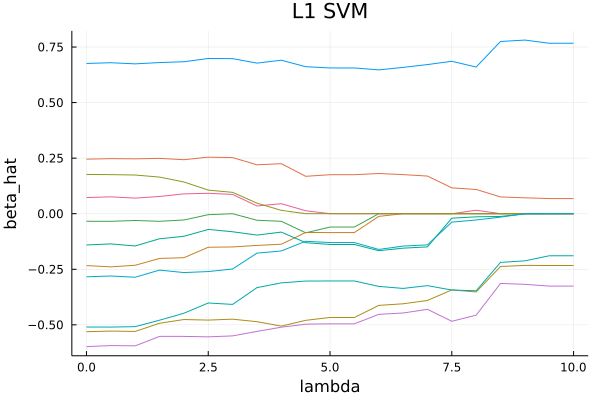

In [6]:
using Plots; gr()

plt = Plots.plot(collect(λgrid), β̂svmpath, legend=:none)  # not Gadfly.plot
xlabel!(plt, "lambda")
ylabel!(plt, "beta_hat")
title!(plt, "L1 SVM")


## Remark

* Many more applications of LP, especially in the [assignment problem](https://en.wikipedia.org/wiki/Assignment_problem): airport scheduling (Copenhagen airport uses Gurobi), airline flight scheduling, NFL scheduling, match.com, ...

* Apparently any loss/penalty or loss/constraint combinations of form 
$$
\{\ell_1, \ell_\infty, \text{quantile}\} \times \{\ell_1, \ell_\infty, \text{quantile}\},
$$
possibly with affine (equality and/or inequality) constraints, can be formulated as an LP.

## Acknowledgment

Many parts of this lecture note is based on [Dr. Hua Zhou](http://hua-zhou.github.io)'s 2019 Spring Statistical Computing course notes available at <http://hua-zhou.github.io/teaching/biostatm280-2019spring/index.html>.